In [69]:
from sklearn.datasets import make_moons, make_circles
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

Сгенерированные случайным образом наборы данных:

<Axes: >

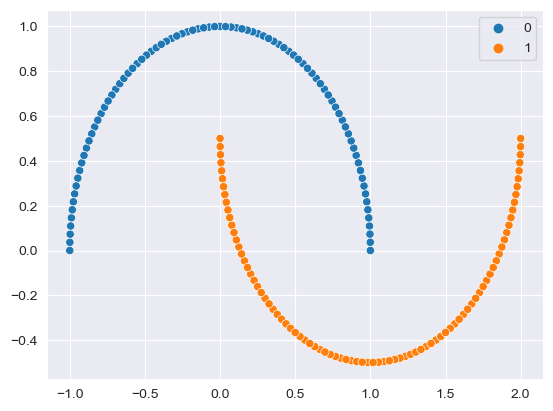

In [70]:
samples_moons, class_moons = make_moons(n_samples=175)
sns.scatterplot(x=samples_moons[:, 0], y=samples_moons[:, 1], hue=class_moons)

<Axes: >

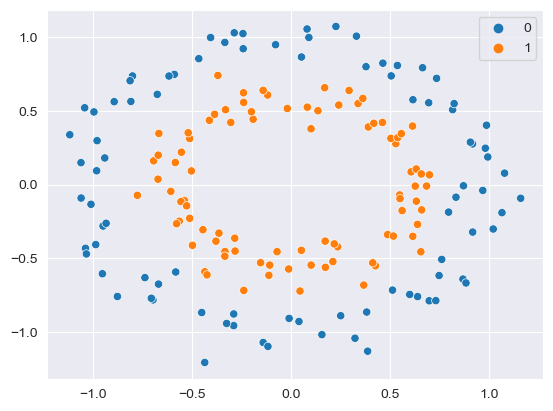

In [71]:
samples_circles, class_circles = make_circles(n_samples=175, factor=0.6, noise=0.09)
sns.scatterplot(x=samples_circles[:, 0], y=samples_circles[:, 1], hue=class_circles)

<Axes: >

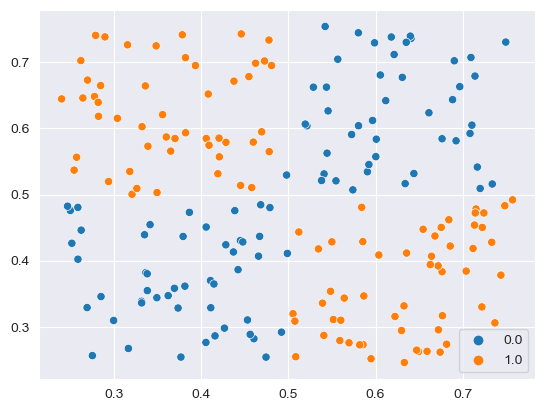

In [72]:
samples_checkers = np.ndarray(shape=(200, 2))
X_checkers = np.random.uniform(0, 1, 200)
Y_checkers = np.random.uniform(0, 1, 200)
for i in range(200):
    samples_checkers[i][0] = X_checkers[i]
    samples_checkers[i][1] = Y_checkers[i]
class_checkers = np.array([])
for i in range(200):
    if (samples_checkers[i][0] < 0.5 and samples_checkers[i][1] < 0.5) or (samples_checkers[i][0] > 0.5 and samples_checkers[i][1] > 0.5):
        class_checkers = np.append(class_checkers, 0)
    else:
        class_checkers = np.append(class_checkers, 1)
gaussian_noise = np.random.normal(0.5, 0.01, 200)
for i in range(200):
    samples_checkers[i][0] = (samples_checkers[i][0] + gaussian_noise[i]) / 2
    samples_checkers[i][1] = (samples_checkers[i][1] + gaussian_noise[i]) / 2
sns.scatterplot(x=samples_checkers[:, 0], y=samples_checkers[:, 1], hue=class_checkers)

Деление датасетов на train/test

In [73]:
samples_moons_train, samples_moons_test, class_moons_train, class_moons_test  = train_test_split(samples_moons, class_moons, train_size=0.8)
samples_circles_train, samples_circles_test, class_circles_train, class_circles_test = train_test_split(samples_circles, class_circles, train_size=0.8)
samples_checkers_train, samples_checkers_test, class_checkers_train, class_checkers_test = train_test_split(samples_checkers, class_checkers, train_size=0.8)

Обучение и прогнозы KNN

In [74]:
classifier_moons = KNeighborsClassifier(n_neighbors=5)
classifier_moons.fit(samples_moons_train, class_moons_train)
moons_prediction = classifier_moons.predict(samples_moons_test)
classifier_circles = KNeighborsClassifier(n_neighbors=5)
classifier_circles.fit(samples_circles_train, class_circles_train)
circles_prediction = classifier_circles.predict(samples_circles_test)
classifier_checkers = KNeighborsClassifier(n_neighbors=5)
classifier_checkers.fit(samples_checkers_train, class_checkers_train)
checkers_prediction = classifier_checkers.predict(samples_checkers_test)

Оценка

In [75]:
print("Moons:")
print(confusion_matrix(class_moons_test, moons_prediction))
print(classification_report(class_moons_test, moons_prediction))
print("Circles:")
print(confusion_matrix(class_circles_test, circles_prediction))
print(classification_report(class_circles_test, circles_prediction))
print("Checkers")
print(confusion_matrix(class_checkers_test, checkers_prediction))
print(classification_report(class_checkers_test, checkers_prediction))

Moons:
[[13  0]
 [ 0 22]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        22

    accuracy                           1.00        35
   macro avg       1.00      1.00      1.00        35
weighted avg       1.00      1.00      1.00        35

Circles:
[[14  1]
 [ 1 19]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        15
           1       0.95      0.95      0.95        20

    accuracy                           0.94        35
   macro avg       0.94      0.94      0.94        35
weighted avg       0.94      0.94      0.94        35

Checkers
[[24  1]
 [ 0 15]]
              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98        25
         1.0       0.94      1.00      0.97        15

    accuracy                           0.97        40
   macro avg       0.97      0.98      0.97   

Графики сравнения с K

<Axes: xlabel='Значение K', ylabel='Ошибка'>

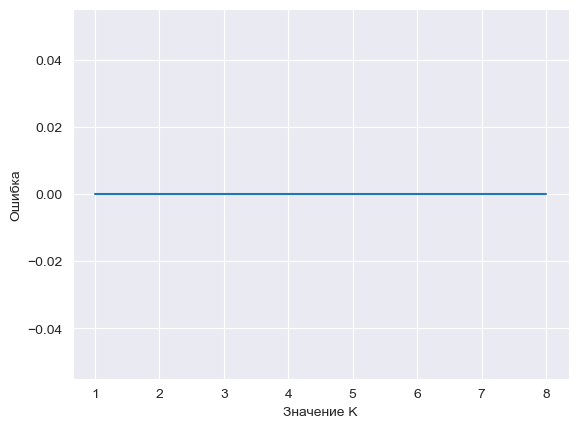

In [76]:
#Среднее значение ошибки для K от 1 до 8
moons_error = pd.DataFrame(columns=['Значение K', 'Ошибка'])
for i in range(1, 9):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(samples_moons_train, class_moons_train)
    prediction_i = knn.predict(samples_moons_test)
    moons_error.loc[len(moons_error.index)] = [i, np.mean(prediction_i != class_moons_test)]
sns.lineplot(data=moons_error, x='Значение K', y='Ошибка')

<Axes: xlabel='Значение K', ylabel='Ошибка'>

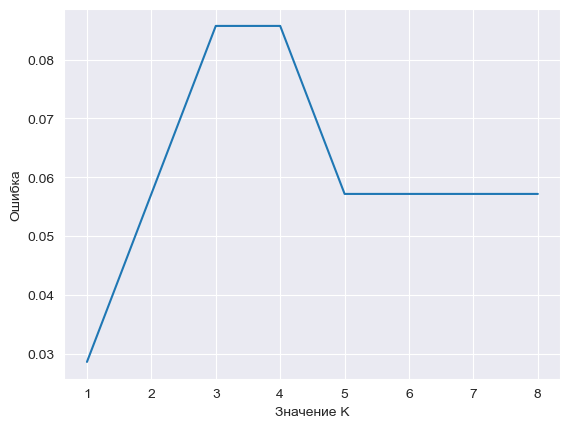

In [77]:
circles_error = pd.DataFrame(columns=['Значение K', 'Ошибка'])
for i in range(1, 9):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(samples_circles_train, class_circles_train)
    prediction_i = knn.predict(samples_circles_test)
    circles_error.loc[len(circles_error.index)] = [i, np.mean(prediction_i != class_circles_test)]
sns.lineplot(data=circles_error, x='Значение K', y='Ошибка')

<Axes: xlabel='Значение K', ylabel='Ошибка'>

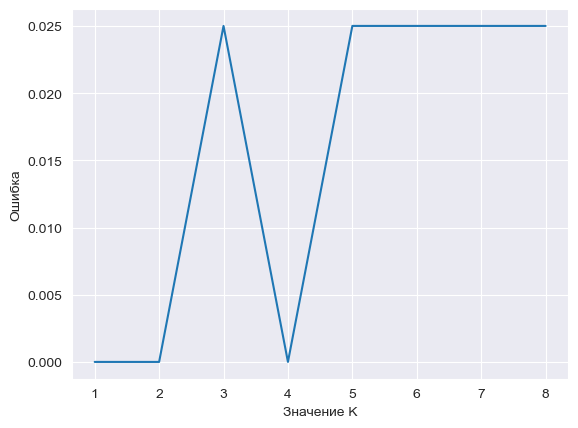

In [78]:
checkers_error = pd.DataFrame(columns=['Значение K', 'Ошибка'])
for i in range(1, 9):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(samples_checkers_train, class_checkers_train)
    prediction_i = knn.predict(samples_checkers_test)
    checkers_error.loc[len(checkers_error.index)] = [i, np.mean(prediction_i != class_checkers_test)]
sns.lineplot(data=checkers_error, x='Значение K', y='Ошибка')

Задание 2

25 объектовклассифицированына 3 класса
C="Cat"
F="Fish"
H="Hen"
#истинные значения y_true = [C,C,C,C,C,C, F,F,F,F,F,F,F,F,F,F, H,H,H,H,H,H,H,H,H]
#результат системы y_pred = [C,C,C,C,H,F, C,C,C,C,C,C,H,H,F,F, C,C,C,H,H,H,H,H,H]

In [79]:
y_true = [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2]
y_pred = [0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 0, 0, 0, 2, 2, 2, 2, 2, 2]
c_matr_test = confusion_matrix(y_true, y_pred)
print(c_matr_test)

[[4 1 1]
 [6 2 2]
 [3 0 6]]


In [80]:
#Матрица путаницы для 3х классового сравнения, классами являются цифры начиная от 0

class_count = 3
c_matr = np.zeros((class_count, class_count), dtype=int)
for i in range(len(y_true)):
    if y_true[i] == 0:
        if y_pred[i] == 0:
            c_matr[0][0] += 1
        elif y_pred[i] == 1:
            c_matr[0][1] += 1
        else:
            c_matr[0][2] += 1
    elif y_true[i] == 1:
        if y_pred[i] == 0:
            c_matr[1][0] += 1
        elif y_pred[i] == 1:
            c_matr[1][1] += 1
        else:
            c_matr[1][2] += 1
    else:
        if y_pred[i] == 0:
            c_matr[2][0] += 1
        elif y_pred[i] == 1:
            c_matr[2][1] += 1
        else:
            c_matr[2][2] += 1
c_matr.tolist()
print(c_matr)

[[4 1 1]
 [6 2 2]
 [3 0 6]]


In [81]:
#Отчет классификации
print(classification_report(y_true, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.308     0.667     0.421         6
           1      0.667     0.200     0.308        10
           2      0.667     0.667     0.667         9

    accuracy                          0.480        25
   macro avg      0.547     0.511     0.465        25
weighted avg      0.581     0.480     0.464        25


In [82]:
#Отчет классификации для 3х классов
#Буду использовать данные которые я уже нашел, написав код для матрицы путаницы


c_matrix_report = np.array(c_matr)
transpose_c_matrix_report = np.transpose(c_matrix_report)
precision = [round(c_matrix_report[i][i] / transpose_c_matrix_report[i].sum(), 3) for i in range(3)]
recall = [round(c_matrix_report[i][i] / c_matrix_report[i].sum(), 3) for i in range(3)]
f_1_score = [round(2 * (precision[i] * recall[i]) / (precision[i] + recall[i]), 3) for i in range(3)]
support = [sum(c_matrix_report[i]) for i in range(3)]
array_1 = [precision, recall, f_1_score]

macro_avg = [round((sum(array_1[i]) / 3), 3) for i in range(3)]
weighted_avg = [round((sum(array_1[j][i] * support[i] for i in range(3)) / sum(support)), 3) for j in range(3)]
accuracy_precision = round(sum(c_matrix_report[i][i] for i in range(3)) / sum(transpose_c_matrix_report[i].sum() for i in range(3)), 3)
accuracy_recall = round(sum(c_matrix_report[i][i]for i in range(3)) / sum(c_matrix_report[i].sum() for i in range(3)), 3)
accuracy_f_1_score = round(2 * sum((precision[i] * recall[i]) for i in range(3)) / sum((precision[i] + recall[i]) for i in range(3)), 3)
accuracy = [accuracy_precision, accuracy_recall, accuracy_f_1_score]
metrics = np.array([accuracy, macro_avg, weighted_avg])
rows_names = ["    accuracy", "   macro avg", "weighted avg"]

In [83]:
print(f'              precision    recall  f1-score   support\n')
for i in range(3):
    print(f'           {i}      {precision[i]}     {recall[i]}     {f_1_score[i]}        {support[i]}')
print('')
for i in range(3):
    print(f'{rows_names[i]}      {metrics[i][0]}     {metrics[i][1]}     {metrics[i][2]}     {sum(support)}')

              precision    recall  f1-score   support

           0      0.308     0.667     0.421        6
           1      0.667     0.2     0.308        10
           2      0.667     0.667     0.667        9

    accuracy      0.48     0.48     0.494     25
   macro avg      0.547     0.511     0.465     25
weighted avg      0.581     0.48     0.464     25
